# ImageProcessing

 <p>Load an image and display it
<p>Use cv2.imread() or PIL.Image.open() to load an image from the dataset.</p>
<p>Display it using matplotlib.pyplot.imshow().</p>
<p>Add a markdown cell explaining:</p>
<p>How the image is stored in memory.</p>
<p>The shape of the NumPy array.</p>






In [109]:
import cv2
import matplotlib.pyplot as plt

In [110]:
img = cv2.imread("/content/panda.png")

In [111]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

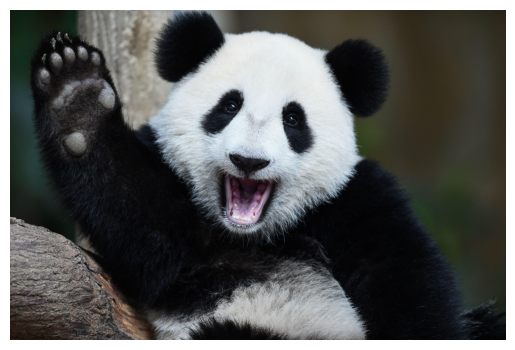

In [112]:
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [113]:
img_rgb.shape

(2330, 3500, 3)

<p>Convert the image to a NumPy array</p>
<p>Convert the loaded image into a NumPy array using np.array().</p>
<p>Print its shape, data type, and first few pixel values.</p>
<p>Add a markdown cell explaining how pixel values are represented.</p>


In [114]:
import numpy as np
img_array = np.array(img_rgb)

In [115]:
print("Shape:", img_array.shape)
print("Data type:", img_array.dtype)
print("First pixel value (top-left corner):", img_array[0, 0])
print("First 5 pixel values in first row:", img_array[0, :5])

Shape: (2330, 3500, 3)
Data type: uint8
First pixel value (top-left corner): [14 27 17]
First 5 pixel values in first row: [[14 27 17]
 [14 27 17]
 [14 27 17]
 [14 27 17]
 [14 27 17]]


## Understanding the Image Data

- **Shape: (2330, 3500, 3)**  
  - `2330` → Height (number of rows = pixels vertically)  
  - `3500` → Width (number of columns = pixels horizontally)  
  - `3` → Number of color channels (RGB: Red, Green, Blue)  
  - This means the image is 2330 × 3500 pixels in size and is a color image.

- **Data type: uint8**  
  - Each pixel value is stored as an **8-bit unsigned integer** (0–255).  
  - `0` = no intensity (black), `255` = full intensity (brightest).

- **First pixel value (top-left corner): [14, 27, 17]**  
  - Red = 14, Green = 27, Blue = 17.  
  - This represents a very dark greenish color.

- **First 5 pixel values in the first row:**  
  - `[[14, 27, 17], [14, 27, 17], [14, 27, 17], [14, 27, 17], [14, 27, 17]]`  
  - All pixels have the same values, meaning the top-left edge of the image has a uniform background color.

In summary: The image is stored as a **3D NumPy array** where each pixel is defined by 3 integers (R, G, B), each ranging from 0–255.


<p>Convert the NumPy array back to an image</p>
<p>Convert the NumPy array back to an image </p>
<p>Display the re-generated image.</p>
<p>Add a markdown cell explaining what happens during this conversion.</p>


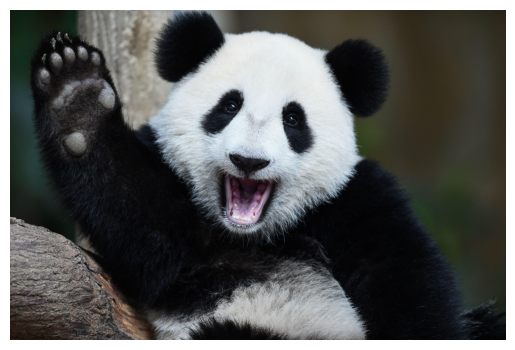

In [116]:
img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Converting a NumPy Array Back to an Image

- A NumPy array stores the image as numerical pixel values.  
- When we use functions like `Image.fromarray()` (PIL) or `cv2.cvtColor()` (OpenCV),  
  the array is re-interpreted as an image.  

- **What happens during conversion?**  
  - Each pixel’s `[R, G, B]` values are mapped back into visible colors.  
  - The 2D grid of numbers is reconstructed into an image format.  
  - No new data is created; we are just changing how the data is *interpreted and displayed*.  

This confirms that images and NumPy arrays are interchangeable:  
- **Image → NumPy array** = numerical representation.  
- **NumPy array → Image** = visual representation.


<p>Create color-filtered images</p>
<p>From the original image array, create:</p>
<p>Grayscale image</p>
<p>Red scale image (keep red channel, set green & blue to 0).</p>
<p>Green scale image (keep green channel, set red & blue to 0).</p>
<p>Blue scale image (keep blue channel, set red & green to 0).</p>
<p>Add a markdown cell explaining:</p>
<p>How each color channel works.</p>
<p>Why zeroing out other channels isolates the desired color.</p>


In [117]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


In [118]:
red_scale = img_rgb.copy()
red_scale[:, :, 1] = 0
red_scale[:, :, 2] = 0

In [119]:
green_scale = img_rgb.copy()
green_scale[:, :, 0] = 0
green_scale[:, :, 2] = 0

In [120]:
blue_scale = img_rgb.copy()
blue_scale[:, :, 0] = 0
blue_scale[:, :, 1] = 0

In [121]:
%matplotlib inline

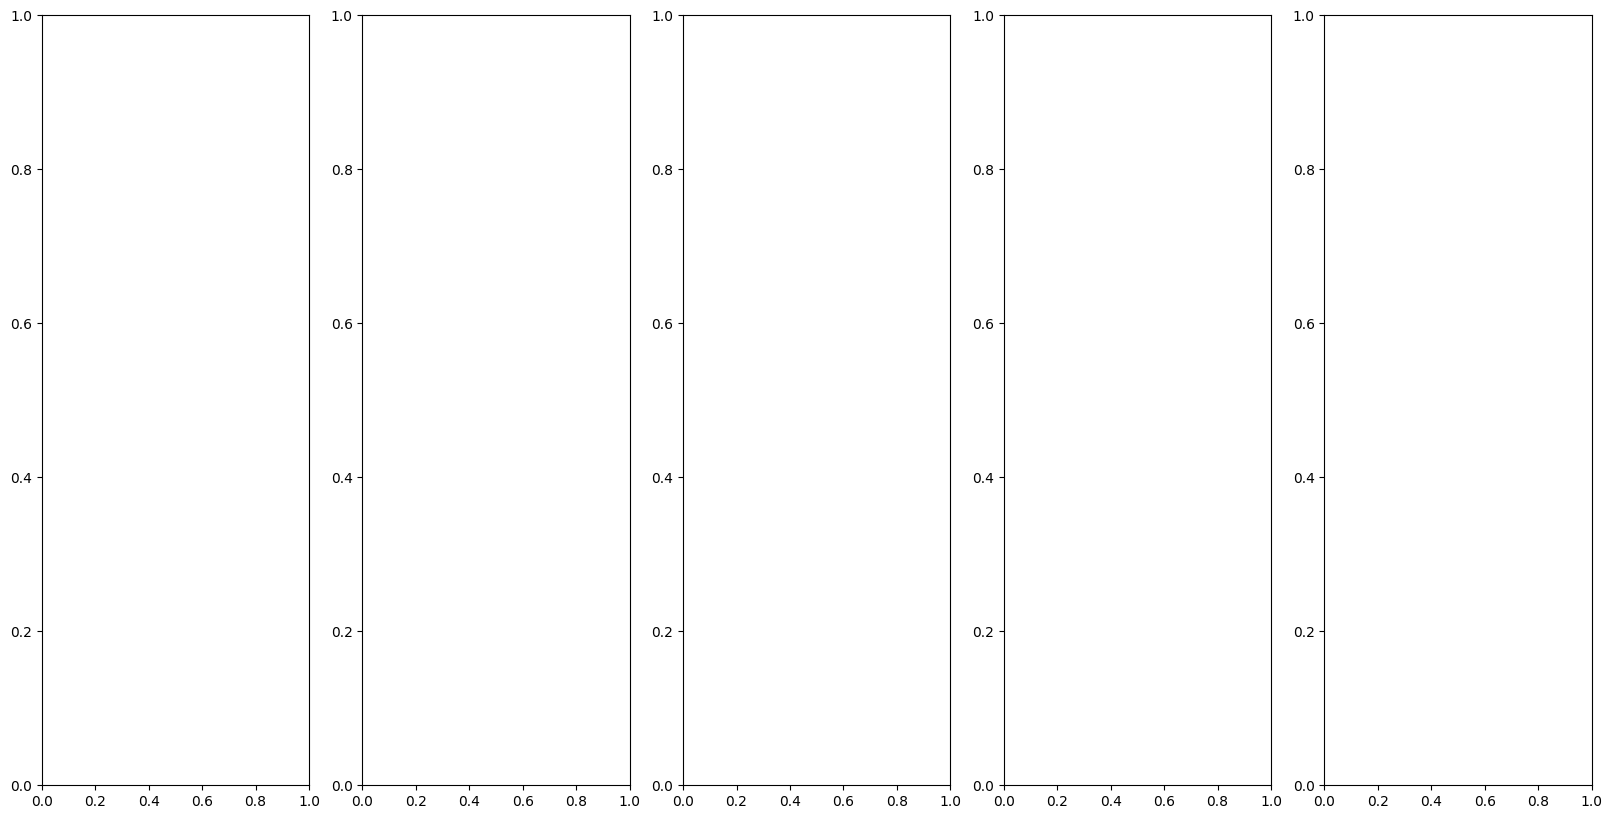

In [122]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

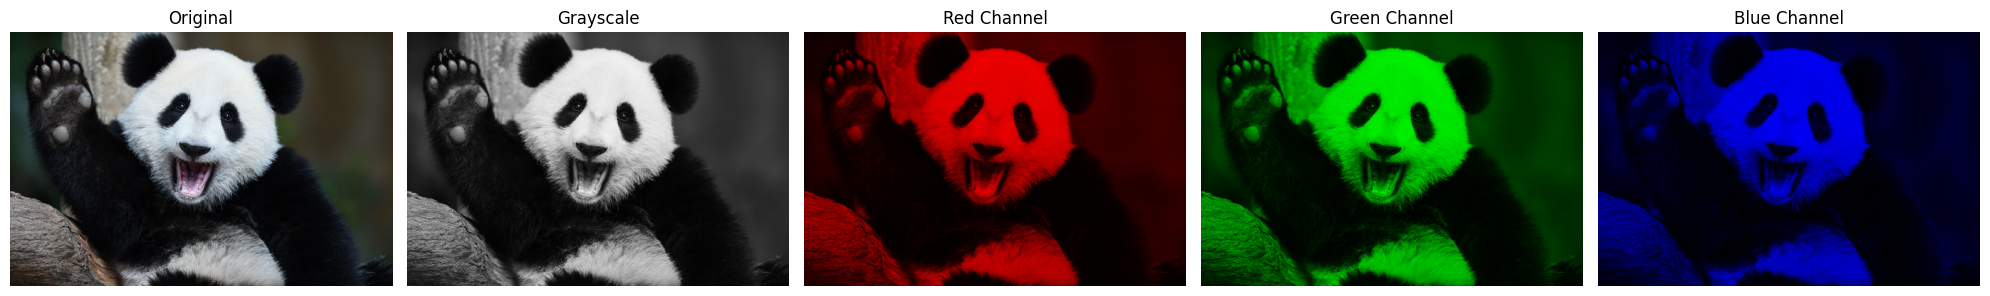

In [123]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(gray, cmap="gray")
axs[1].set_title("Grayscale")
axs[1].axis("off")

axs[2].imshow(red_scale)
axs[2].set_title("Red Channel")
axs[2].axis("off")

axs[3].imshow(green_scale)
axs[3].set_title("Green Channel")
axs[3].axis("off")

axs[4].imshow(blue_scale)
axs[4].set_title("Blue Channel")
axs[4].axis("off")

plt.tight_layout()
plt.show()

### Understanding Color Channels

- A color image in RGB format has **3 channels**:
  - **Red channel** → intensity of red at each pixel.
  - **Green channel** → intensity of green at each pixel.
  - **Blue channel** → intensity of blue at each pixel.

- Each pixel is stored as `[R, G, B]`, where each value ranges from 0–255.

---

### Grayscale Image
- Created by combining information from **all three channels** into a single intensity value.
- Each pixel now has just one number (0 = black, 255 = white).

### Isolating Color Channels
- **Red scale** → Keep red values, set green & blue to 0 → highlights the red content in the image.
- **Green scale** → Keep green values, set red & blue to 0 → highlights the green content.
- **Blue scale** → Keep blue values, set red & green to 0 → highlights the blue content.

---

### Why zeroing out works?
- By setting the other two channels to **0**, only the desired channel contributes to the pixel color.
- Example:  
  - Original pixel = `[120, 80, 40]` (reddish brown)  
  - Red-only = `[120, 0, 0]` → pure red intensity.  
  - Green-only = `[0, 80, 0]` → pure green intensity.  
  - Blue-only = `[0, 0, 40]` → pure blue intensity.  

✅ This shows how each channel contributes to the final image colors.


<p> Display all versions in a grid</p>
<p>Merge these images into a 2×3 grid using matplotlib subplots:</p>
<p>Original</p>
<p>Grayscale</p>
<p>Red scale</p>
<p>Green scale</p>
<p>Blue scale</p>
<p>Combined RGB image again</p>


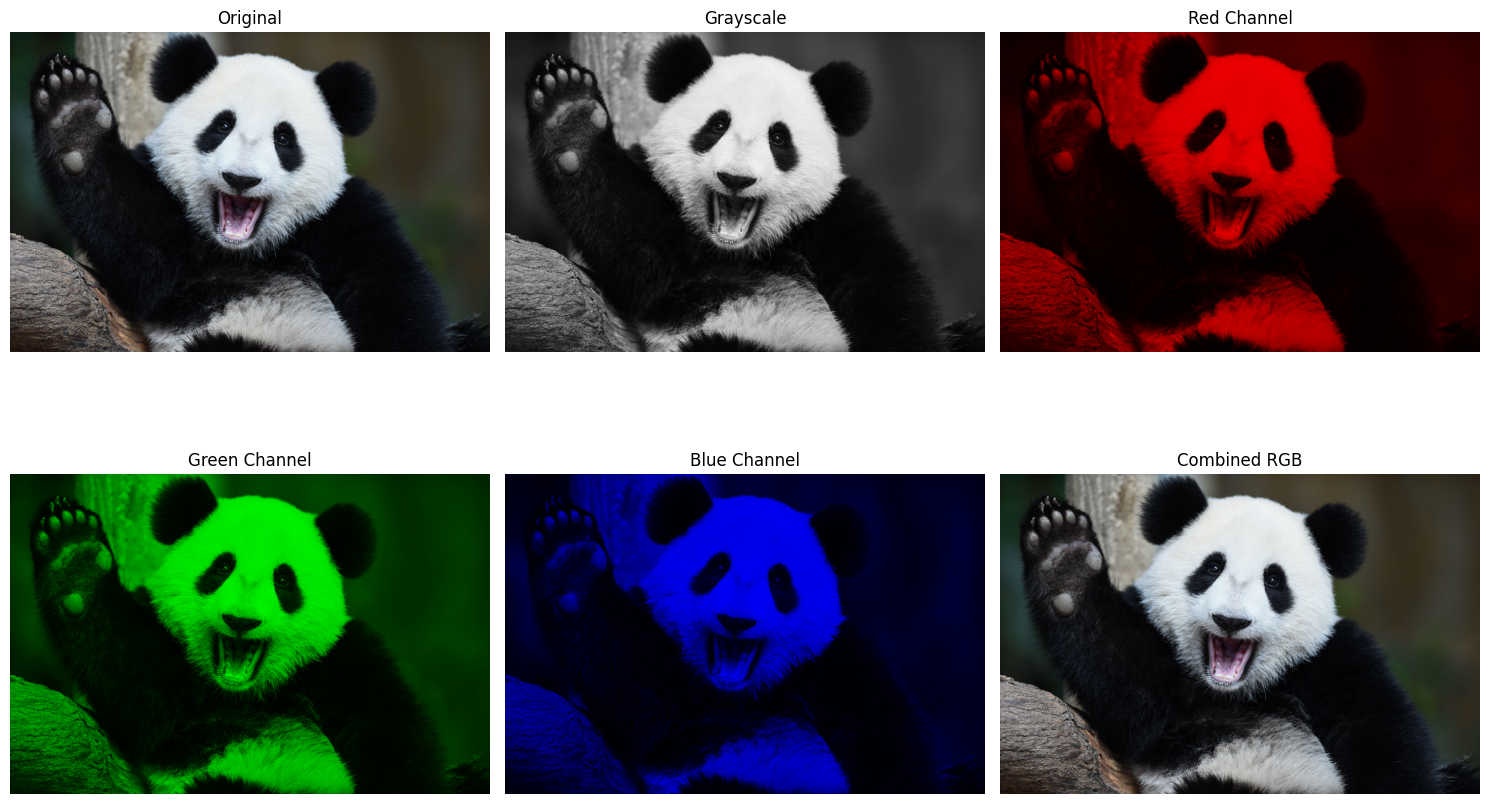

In [124]:
combined = img_rgb.copy()

# --- Display all in 2×3 grid ---
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Original")
axs[0, 0].axis("off")

axs[0, 1].imshow(gray, cmap="gray")
axs[0, 1].set_title("Grayscale")
axs[0, 1].axis("off")

axs[0, 2].imshow(red_scale)
axs[0, 2].set_title("Red Channel")
axs[0, 2].axis("off")

axs[1, 0].imshow(green_scale)
axs[1, 0].set_title("Green Channel")
axs[1, 0].axis("off")

axs[1, 1].imshow(blue_scale)
axs[1, 1].set_title("Blue Channel")
axs[1, 1].axis("off")

axs[1, 2].imshow(combined)
axs[1, 2].set_title("Combined RGB")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()


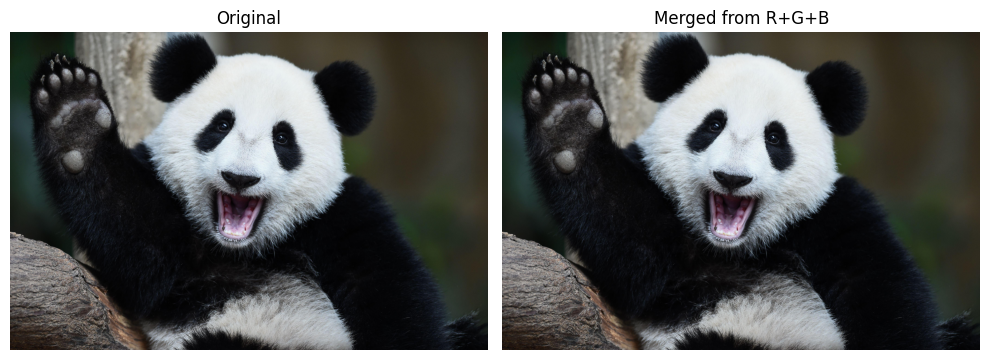

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/panda.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split into channels
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Merge channels back using np.stack
merged = np.stack([R, G, B], axis=2)

# Display original and merged side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(merged)
axs[1].set_title("Merged from R+G+B")
axs[1].axis("off")

plt.tight_layout()
plt.show()


### Merging RGB Channels Back into an Image

- A color image is made up of **three separate 2D arrays**:
  - Red channel → intensities of red.
  - Green channel → intensities of green.
  - Blue channel → intensities of blue.

- By stacking these three arrays along the **third dimension (axis=2)**,  
  we recreate the full **3D NumPy array** with shape `(height, width, 3)`.

- Example:
  - `R` shape → (2330, 3500)
  - `G` shape → (2330, 3500)
  - `B` shape → (2330, 3500)
  - After stacking → (2330, 3500, 3)

- The merged image is identical to the original, confirming that:
  **Original Image = Red Channel + Green Channel + Blue Channel**
